In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import cv2 as cv
import os
from tensorflow import keras
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical

2024-05-03 10:03:31.731400: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-03 10:03:31.731499: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-03 10:03:31.885487: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
train_dir = r'/kaggle/input/animals-detection-images-dataset/train/'
test_dir = r'/kaggle/input/animals-detection-images-dataset/test/'

labels = [
       'Caterpillar','Chicken', 'Crab',
       'Deer', 'Duck', 'Eagle','Fish',
       'Frog', 'Horse',
       'Jellyfish', 'Ladybug',
       'Lizard','Monkey','Owl', 'Parrot',
       'Penguin',
       'Shark','Snail', 'Snake',
       'Sparrow', 'Spider','Squirrel',
       'Tiger', 'Tortoise']

label_len = len(labels)
print(label_len)

24


In [3]:
# Variables for training data
X = []
Y = []

# Loading data
for label in labels:
    folderpath = os.path.join(train_dir, label)
    
    for file in os.listdir(folderpath):
        img_path = os.path.join(folderpath, file)
        img = cv.imread(img_path)
        
        if img is not None:
            img = cv.resize(img, (224, 224))
            X.append(np.array(img))
            Y.append(labels.index(label))

# Converting lists to NumPy arrays
X = np.array(X)
Y = np.array(Y)

In [4]:
print("Training data dimensions:")
print("X shape:", X.shape)
print("Y shape:", Y.shape)

Training data dimensions:
X shape: (12262, 224, 224, 3)
Y shape: (12262,)


In [5]:
# Variables for validation data
X_valid = []
Y_valid = []
X_valid_path = []

# Loading data
for label in labels:
    folderpath = os.path.join(test_dir, label)
    
    for file in os.listdir(folderpath):
        img_path = os.path.join(folderpath, file)
        img = cv.imread(img_path)
        
        if img is not None:
            img = cv.resize(img, (224, 224))
            X_valid.append(np.array(img))
            X_valid_path.append(img_path)
            Y_valid.append(labels.index(label))
            
X_valid = np.array(X_valid)
Y_valid = np.array(Y_valid)

In [6]:
print("\nDimensions of validation data:")
print("X_valid shape:", X_valid.shape)
print("Y_valid shape:", Y_valid.shape)


Dimensions of validation data:
X_valid shape: (3544, 224, 224, 3)
Y_valid shape: (3544,)


In [7]:
total_images = X.shape[0] + X_valid.shape[0]
print("Total number of images:", total_images)

Total number of images: 15806


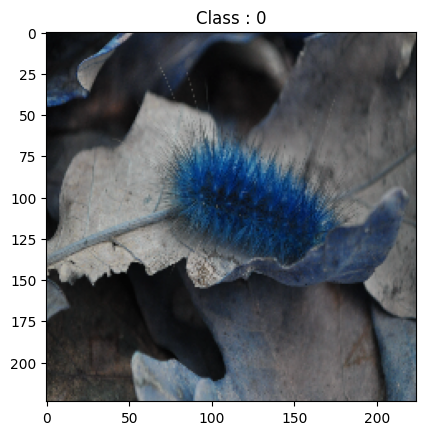

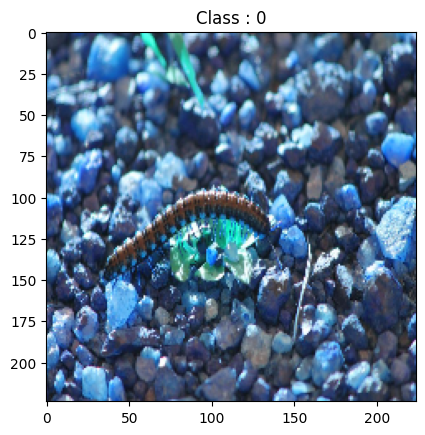

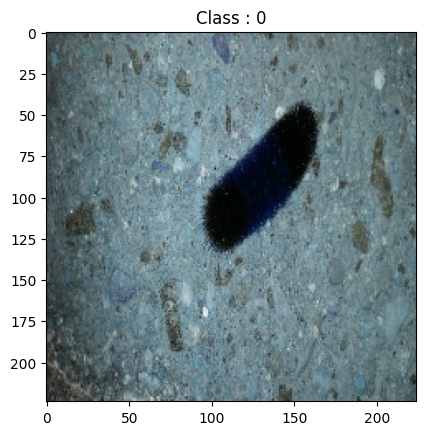

In [8]:
for i in range(3):
    plt.imshow(X[i])
    plt.title(f"Class : {Y[i]}")
    plt.show()

In [9]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
base_model.trainable = False

In [11]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(len(labels), activation='softmax')(x)

In [12]:
model = Model(inputs=base_model.input, outputs=predictions)

In [13]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
# Converting labels into one-hot categories
Y_one_hot = to_categorical(Y)
Y_valid_one_hot = to_categorical(Y_valid)

In [15]:
history = model.fit(X, Y_one_hot, epochs=20, validation_data=(X_valid, Y_valid_one_hot))

Epoch 1/20
  1/384 ━━━━━━━━━━━━━━━━━━━━ 1:52:08 18s/step - accuracy: 0.0312 - loss: 3.8460

I0000 00:00:1714731514.037868     288 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1714731514.085240     288 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


384/384 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.7085 - loss: 1.0585

W0000 00:00:1714731552.761195     288 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


384/384 ━━━━━━━━━━━━━━━━━━━━ 71s 139ms/step - accuracy: 0.7087 - loss: 1.0576 - val_accuracy: 0.8801 - val_loss: 0.4092
Epoch 2/20
  2/384 ━━━━━━━━━━━━━━━━━━━━ 30s 79ms/step - accuracy: 0.8438 - loss: 0.5060

W0000 00:00:1714731567.474078     290 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


384/384 ━━━━━━━━━━━━━━━━━━━━ 38s 100ms/step - accuracy: 0.8812 - loss: 0.3679 - val_accuracy: 0.8869 - val_loss: 0.3998
Epoch 3/20
384/384 ━━━━━━━━━━━━━━━━━━━━ 40s 105ms/step - accuracy: 0.9122 - loss: 0.2610 - val_accuracy: 0.8846 - val_loss: 0.4288
Epoch 4/20
384/384 ━━━━━━━━━━━━━━━━━━━━ 40s 103ms/step - accuracy: 0.9442 - loss: 0.1707 - val_accuracy: 0.9055 - val_loss: 0.3811
Epoch 5/20
384/384 ━━━━━━━━━━━━━━━━━━━━ 40s 104ms/step - accuracy: 0.9611 - loss: 0.1199 - val_accuracy: 0.8967 - val_loss: 0.5280
Epoch 6/20
384/384 ━━━━━━━━━━━━━━━━━━━━ 40s 104ms/step - accuracy: 0.9661 - loss: 0.1104 - val_accuracy: 0.9041 - val_loss: 0.5449
Epoch 7/20
384/384 ━━━━━━━━━━━━━━━━━━━━ 40s 104ms/step - accuracy: 0.9628 - loss: 0.1163 - val_accuracy: 0.8956 - val_loss: 0.5714
Epoch 8/20
384/384 ━━━━━━━━━━━━━━━━━━━━ 40s 104ms/step - accuracy: 0.9786 - loss: 0.0663 - val_accuracy: 0.8959 - val_loss: 0.6833
Epoch 9/20
384/384 ━━━━━━━━━━━━━━━━━━━━ 40s 104ms/step - accuracy: 0.9781 - loss: 0.0708 - val

In [16]:
Y_pred = model.predict(X_valid)
Y_pred_classes = np.argmax(Y_pred, axis=1)

  3/111 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step

W0000 00:00:1714732336.175328     291 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


111/111 ━━━━━━━━━━━━━━━━━━━━ 16s 108ms/step


W0000 00:00:1714732348.098915     291 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [17]:
conf_matrix = confusion_matrix(Y_valid, Y_pred_classes)
acc_score = accuracy_score(Y_valid, Y_pred_classes)
print("Accuracy score:", acc_score)

Accuracy score: 0.891647855530474


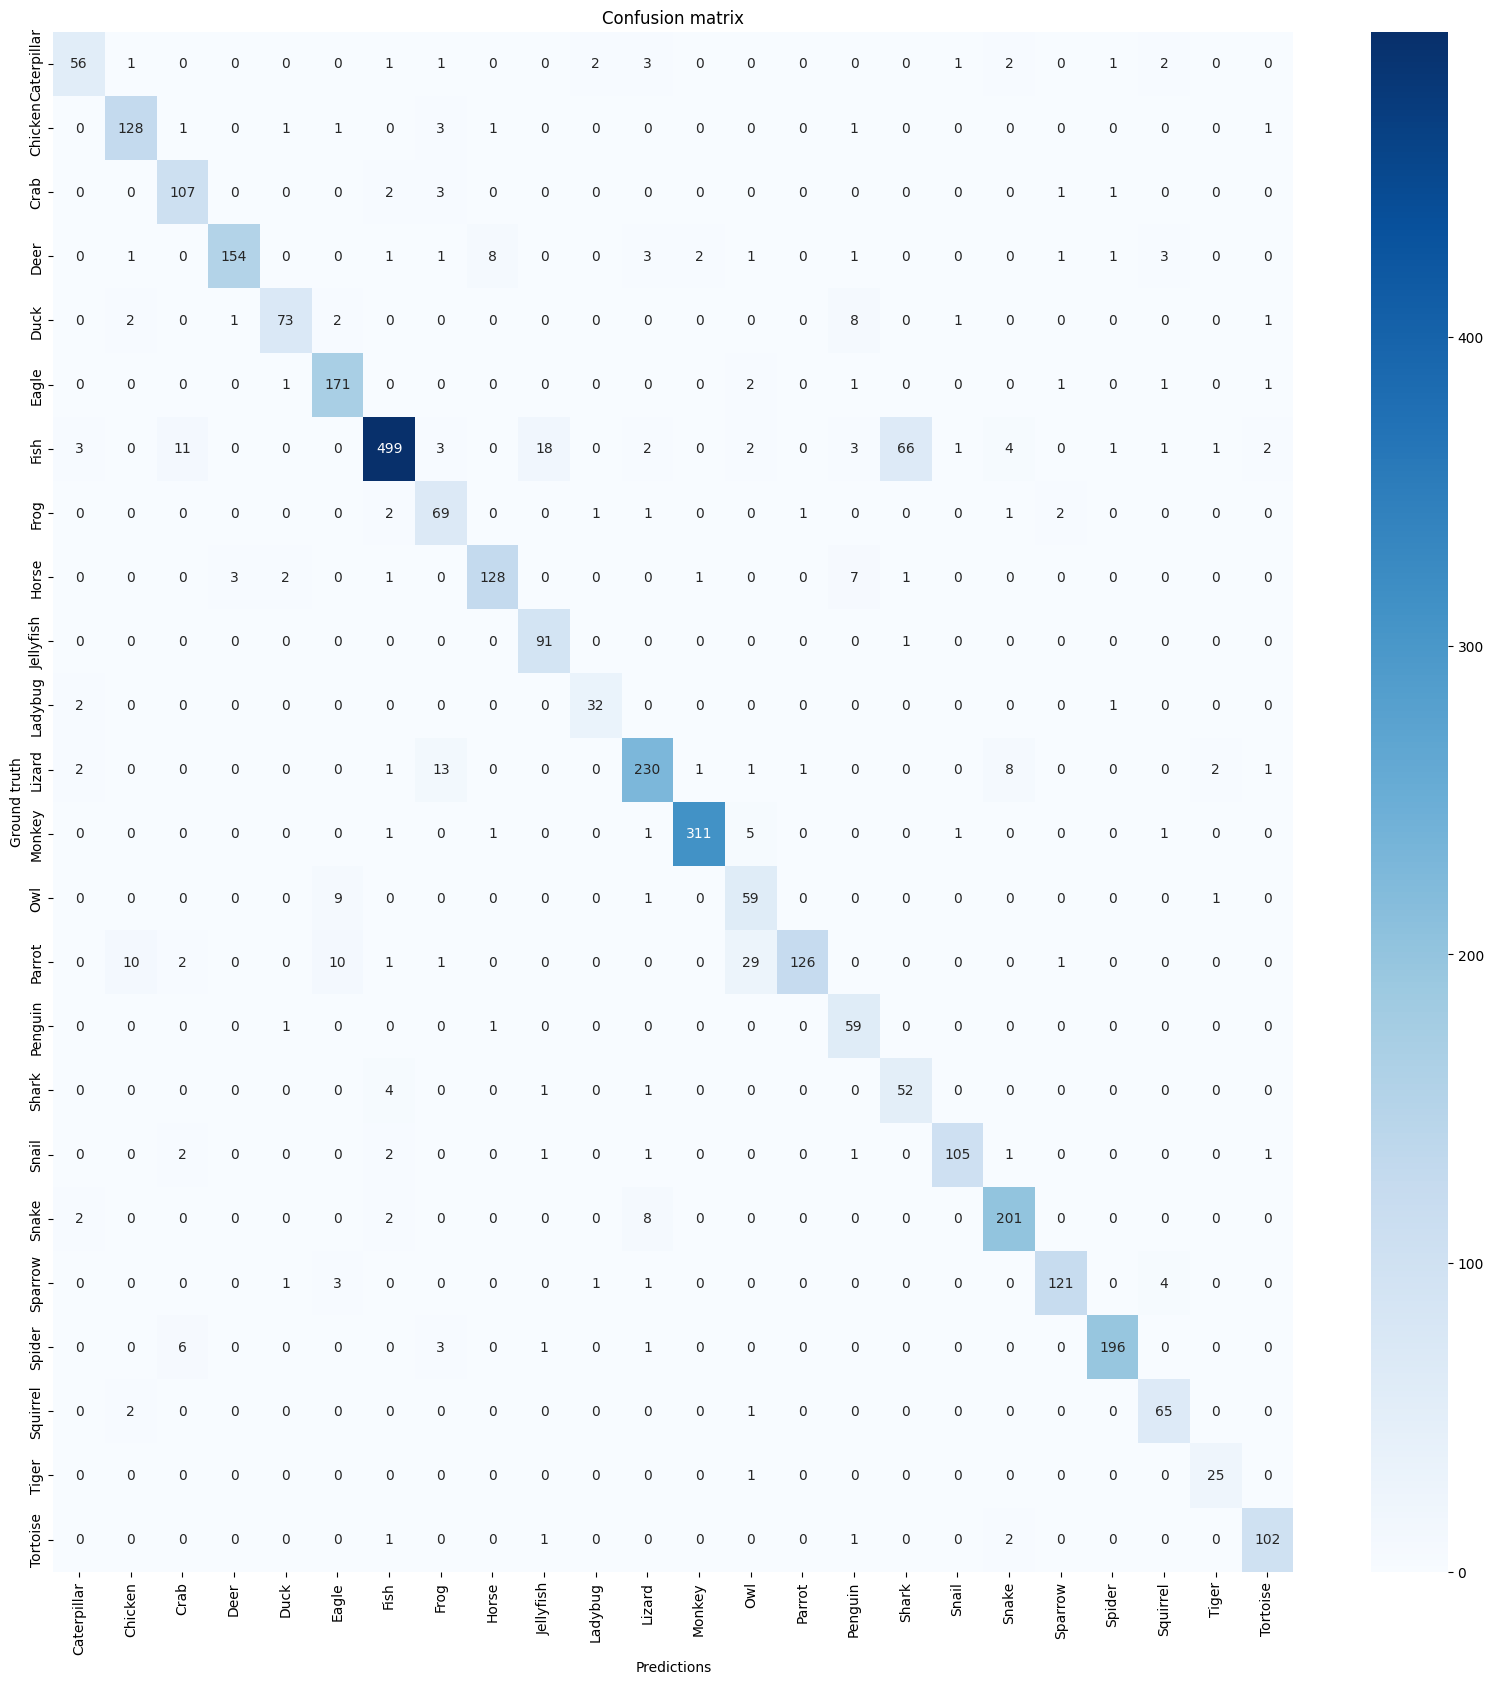

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title('Confusion matrix')
plt.xlabel('Predictions')
plt.ylabel('Ground truth')
plt.show()

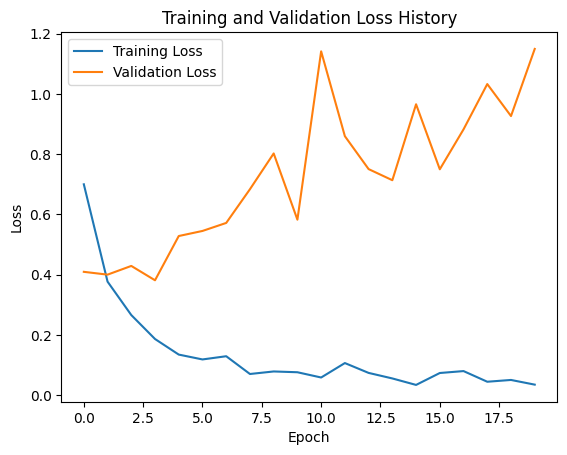

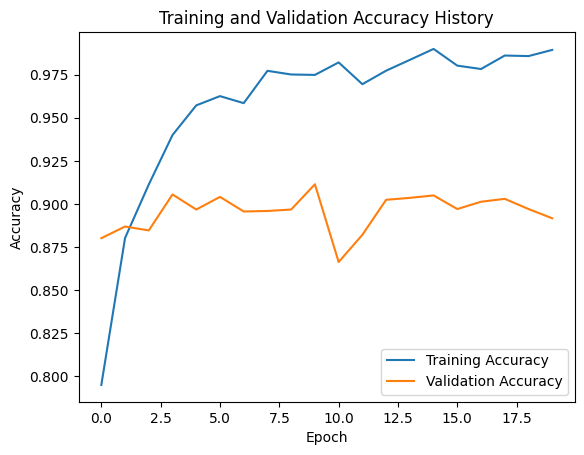

In [20]:
# Viewing loss history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss History')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Viewing Accuracy History
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [21]:
report = classification_report(Y_valid, Y_pred_classes, target_names=labels)
print(report)

              precision    recall  f1-score   support

 Caterpillar       0.86      0.80      0.83        70
     Chicken       0.89      0.93      0.91       137
        Crab       0.83      0.94      0.88       114
        Deer       0.97      0.87      0.92       177
        Duck       0.92      0.83      0.87        88
       Eagle       0.87      0.96      0.91       178
        Fish       0.96      0.81      0.88       617
        Frog       0.71      0.90      0.79        77
       Horse       0.92      0.90      0.91       143
   Jellyfish       0.81      0.99      0.89        92
     Ladybug       0.89      0.91      0.90        35
      Lizard       0.91      0.88      0.90       260
      Monkey       0.99      0.97      0.98       321
         Owl       0.58      0.84      0.69        70
      Parrot       0.98      0.70      0.82       180
     Penguin       0.72      0.97      0.83        61
       Shark       0.43      0.90      0.58        58
       Snail       0.96    

In [22]:
model.save('ResNet50_DEL.h5')